# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

619

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
import requests

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
columns = ['City', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed', 'Country', 'Date']
df_weather_summary = pd.DataFrame(columns = columns)
total_number_of_cities = len(cities)

for index, city in enumerate(cities):
    r = requests.get('http://api.openweathermap.org/data/2.5/weather?units=imperial&q={0}&appid={1}'.format(city, weather_api_key))
    code = r.json()['cod']
    
    if code == '404':
        print('City not found. Skipping...')
    else:
        city_name = r.json()['name']
        lat, lng = r.json()['coord']['lat'], r.json()['coord']['lon']
        max_temp = float(r.json()['main']['temp_max'])
        humidity = float(r.json()['main']['humidity'])
        cloud = float(r.json()['clouds']['all'])
        wind = r.json()['wind']['speed']
        country = r.json()['sys']['country']
        date = r.json()['dt']
        print('Processing Record {0:4d} of {1} cities | {2}'.format(index+1, total_number_of_cities, city))
        df_weather_summary = df_weather_summary.append({
            'City': city_name,
            'Lat': lat,
            'Lng': lng,
            'Max Temp': max_temp,
            'Humidity': humidity,
            'Cloudiness': cloud,
            'Wind Speed': wind,
            'Country': country,
            'Date': int(date)},
            ignore_index = True
        )
print('-----------------------------')
print('Data Retrieval Complete')
print('-----------------------------')

Processing Record    1 of 619 cities | hermanus
Processing Record    2 of 619 cities | ushuaia
Processing Record    3 of 619 cities | albany
Processing Record    4 of 619 cities | mataura
Processing Record    5 of 619 cities | port elizabeth
Processing Record    6 of 619 cities | gamboma
Processing Record    7 of 619 cities | kutum
Processing Record    8 of 619 cities | minsk
Processing Record    9 of 619 cities | atuona
Processing Record   10 of 619 cities | salalah
Processing Record   11 of 619 cities | provideniya
Processing Record   12 of 619 cities | punta arenas
Processing Record   13 of 619 cities | sao borja
City not found. Skipping...
Processing Record   15 of 619 cities | bengkulu
Processing Record   16 of 619 cities | mitsamiouli
Processing Record   17 of 619 cities | great falls
Processing Record   18 of 619 cities | esperance
Processing Record   19 of 619 cities | talnakh
Processing Record   20 of 619 cities | castro
Processing Record   21 of 619 cities | hilo
Processing R

In [6]:
df_weather_summary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        569 non-null    object 
 1   Lat         569 non-null    float64
 2   Lng         569 non-null    float64
 3   Max Temp    569 non-null    float64
 4   Humidity    569 non-null    float64
 5   Cloudiness  569 non-null    float64
 6   Wind Speed  569 non-null    float64
 7   Country     569 non-null    object 
 8   Date        569 non-null    object 
dtypes: float64(6), object(3)
memory usage: 40.1+ KB


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [24]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
df_weather_summary.head(15)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Hermanus,-34.42,19.23,55.99,74.0,0.0,3.83,ZA,1589669436
1,Ushuaia,-54.80,-68.30,42.80,75.0,40.0,8.05,AR,1589669436
2,Albany,42.60,-73.97,71.01,44.0,59.0,3.04,US,1589669404
3,Mataura,-46.19,168.86,50.41,64.0,0.0,1.88,NZ,1589669437
4,Port Elizabeth,-33.92,25.57,48.20,93.0,1.0,5.82,ZA,1589669437
5,Gamboma,-1.88,15.86,77.67,71.0,31.0,2.98,CG,1589669758
6,Kutum,14.20,24.67,75.27,17.0,0.0,7.65,SD,1589669510
7,Minsk,53.90,27.57,42.80,75.0,44.0,6.71,BY,1589669670
8,Atuona,-9.80,-139.03,80.98,79.0,8.0,16.49,PF,1589669419
9,Salalah,17.02,54.09,84.20,83.0,29.0,6.20,OM,1589669758


In [8]:
# Export the City_Data into a csv
df_weather_summary.to_csv("weather_df2.csv", index = 0)

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

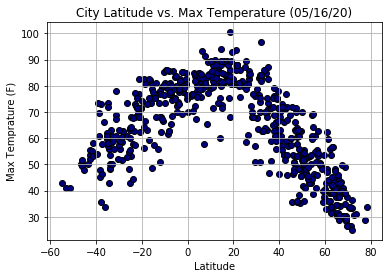

In [8]:
plt.scatter(df_weather_summary["Lat"], df_weather_summary["Max Temp"], marker = "o", facecolor = "navy", edgecolor="black")
plt.title("City Latitude vs. Max Temperature (%s)" % time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Max Temprature (F)")
plt.grid()
plt.show()

## Latitude vs. Humidity Plot

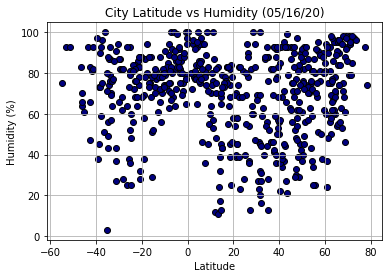

In [9]:
plt.scatter(df_weather_summary["Lat"], df_weather_summary["Humidity"], marker = "o", facecolor = "navy", edgecolor="black")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs Humidity (%s)" % time.strftime("%x"))
plt.grid()
plt.show()

## Latitude vs. Cloudiness Plot

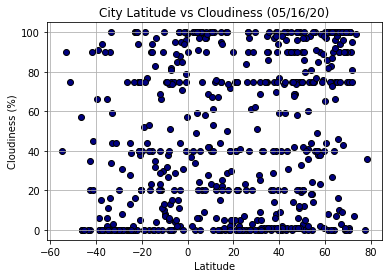

In [10]:
plt.scatter(df_weather_summary["Lat"], df_weather_summary["Cloudiness"], marker = "o", facecolor = "navy", edgecolor="black")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs Cloudiness (%s)" % time.strftime("%x"))
plt.grid()
plt.show()

## Latitude vs. Wind Speed Plot

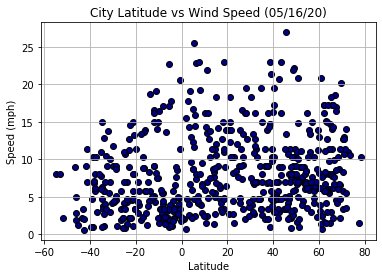

In [11]:
plt.scatter(df_weather_summary["Lat"], df_weather_summary["Wind Speed"], marker = "o", facecolor = "navy", edgecolor="black")
plt.xlabel("Latitude")
plt.ylabel("Speed (mph)")
plt.title("City Latitude vs Wind Speed (%s)" % time.strftime("%x"))
plt.grid()
plt.show()

## Linear Regression

In [12]:
# Create Northern and Southern Hemisphere DataFrames

In [13]:
# Create Northern and Southern Hemisphere DataFrames
northern_hemisphere = df_weather_summary.loc[df_weather_summary["Lat"] > 0.01]
southern_hemisphere = df_weather_summary.loc[df_weather_summary["Lat"] < 0.01]


In [14]:
northern_hemisphere.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
2,Albany,42.60,-73.97,71.01,44.0,59.0,3.04,US,1589669404
6,Kutum,14.20,24.67,75.27,17.0,0.0,7.65,SD,1589669510
7,Minsk,53.90,27.57,42.80,75.0,44.0,6.71,BY,1589669670
9,Salalah,17.02,54.09,84.20,83.0,29.0,6.20,OM,1589669758
10,Provideniya,64.38,-173.30,42.89,60.0,96.0,5.50,RU,1589669459


In [15]:
southern_hemisphere.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Hermanus,-34.42,19.23,55.99,74.0,0.0,3.83,ZA,1589669436
1,Ushuaia,-54.80,-68.30,42.80,75.0,40.0,8.05,AR,1589669436
3,Mataura,-46.19,168.86,50.41,64.0,0.0,1.88,NZ,1589669437
4,Port Elizabeth,-33.92,25.57,48.20,93.0,1.0,5.82,ZA,1589669437
5,Gamboma,-1.88,15.86,77.67,71.0,31.0,2.98,CG,1589669758


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

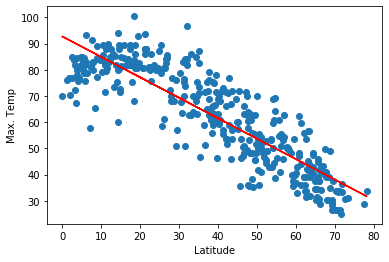

In [16]:
#Create a Scatter Plot for Lattitude vs Temperature of City
x_values = northern_hemisphere['Lat']
y_values = northern_hemisphere['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"red")
#plt.annotate(line_eq,(5,10),fontsize = 15,color = "red")

plt.ylabel("Max. Temp")
plt.xlabel("Latitude")
plt.show()

#plt.savefig("NORTHERN MAX TEMP VS LAT.png")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

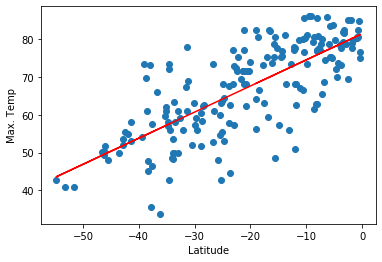

In [17]:
#Create a Scatter Plot for Lattitude vs Temperature of City (Southern Hemisphere)
x_values = southern_hemisphere['Lat']
y_values = southern_hemisphere['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

#plt.annotate(line_eq,(6,10),fontsize=15,color="red")

#plt.ylim(30, 100)
#plt.xlim(-60, 0, 10)

plt.ylabel("Max. Temp")
plt.xlabel("Latitude")
plt.show()

#plt.savefig("SOUNTHERN MAX TEMP VS LAT.png")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

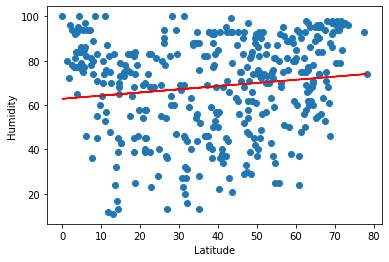

In [18]:
x_values = northern_hemisphere['Lat']
y_values = northern_hemisphere['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,"r-")
#plt.annotate(line_eq,(6,10),fontsize=15,color="red")

plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.show()

#plt.savefig("NORTH HUM VS LAT.png")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

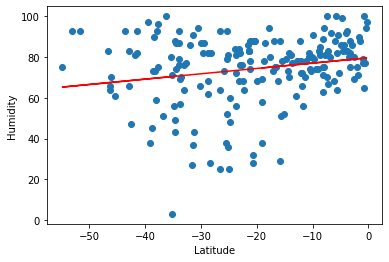

In [19]:
x_values = southern_hemisphere['Lat']
y_values = southern_hemisphere['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
#plt.annotate(line_eq,(-25,10),fontsize=15,color="red")

plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.show()

#plt.savefig("SOUTH HUM VS LAT.png")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

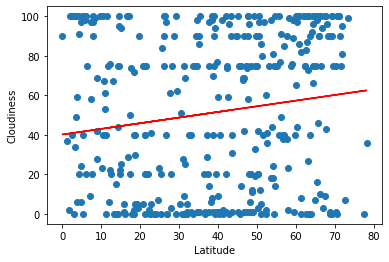

In [20]:
x_values = northern_hemisphere['Lat']
y_values = northern_hemisphere['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
#plt.annotate(line_eq,(6,10),fontsize=15,color="red")

plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.show()

#plt.savefig("NORTH CLOUD VS LAT.png")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

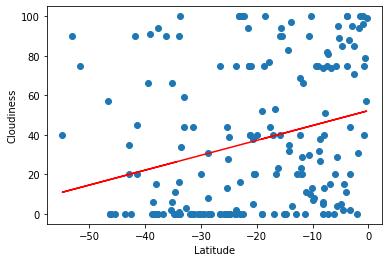

In [21]:
x_values = southern_hemisphere['Lat']
y_values = southern_hemisphere['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
#plt.annotate(line_eq,(-25,10),fontsize = 15,color = "red")

plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.show()

#plt.savefig("SOUTH CLOUD VS LAT.png")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

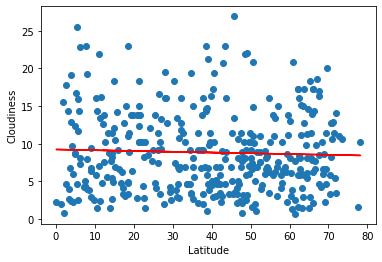

In [22]:
x_values = northern_hemisphere['Lat']
y_values = northern_hemisphere['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
#plt.annotate(line_eq,(45,22),fontsize=15,color="red")

plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.show()

#plt.savefig("NORTH WIND VS LAT.png")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

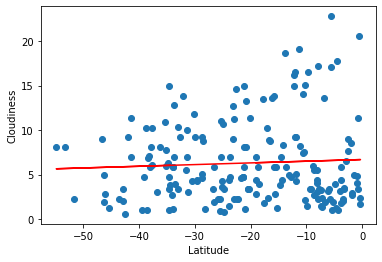

In [23]:
x_values = southern_hemisphere['Lat']
y_values = southern_hemisphere['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
#plt.annotate(line_eq,(-25,25),fontsize=15,color="red")

plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.show()

#plt.savefig("SOUTH WIND VS LAT.png")